In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'emnist' dataset.
Path to dataset files: /kaggle/input/emnist


In [ ]:
import os

dataset_path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", dataset_path)

print(os.listdir(dataset_path))

Using Colab cache for faster access to the 'emnist' dataset.
Path to dataset files: /kaggle/input/emnist
['emnist-letters-mapping.txt', 'emnist-letters-test.csv', 'emnist-mnist-mapping.txt', 'emnist-digits-train.csv', 'emnist-bymerge-mapping.txt', 'emnist-balanced-train.csv', 'emnist-digits-test.csv', 'emnist-balanced-test.csv', 'emnist-mnist-test.csv', 'emnist-letters-train.csv', 'emnist-byclass-train.csv', 'emnist-bymerge-test.csv', 'emnist-balanced-mapping.txt', 'emnist-mnist-train.csv', 'emnist-digits-mapping.txt', 'emnist-bymerge-train.csv', 'emnist-byclass-test.csv', 'emnist_source_files', 'emnist-byclass-mapping.txt']


In [ ]:
import os
import pandas as pd

dataset_path = "/root/.cache/kagglehub/datasets/crawford/emnist/versions/3"

train_path = os.path.join(dataset_path, "emnist-letters-train.csv")
test_path  = os.path.join(dataset_path, "emnist-letters-test.csv")

In [ ]:
train_data = pd.read_csv("/content/emnist-letters-train.csv", header=None)
test_data = pd.read_csv("/content/emnist-letters-test.csv", header=None)

print(train_data.shape)
print(test_data.shape)

(1629, 785)
(1591, 785)


In [ ]:
import os

for root, dirs, files in os.walk('/kaggle/input'):
    for f in files:
        print(os.path.join(root, f))


/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
test_data = pd.read_csv("/content/emnist-letters-test.csv", header=None)
train_data = pd.read_csv("/content/emnist-letters-train.csv", header=None)

In [18]:
print(train_data.shape)
print(test_data.shape)

(5970, 785)
(6456, 785)


In [ ]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [ ]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#unique values in label columns
number_of_labels = train_data['label'].nunique()

In [ ]:
train_data.shape

(88800, 785)

In [ ]:
test_data.shape

(14800, 785)

In [ ]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize class balance

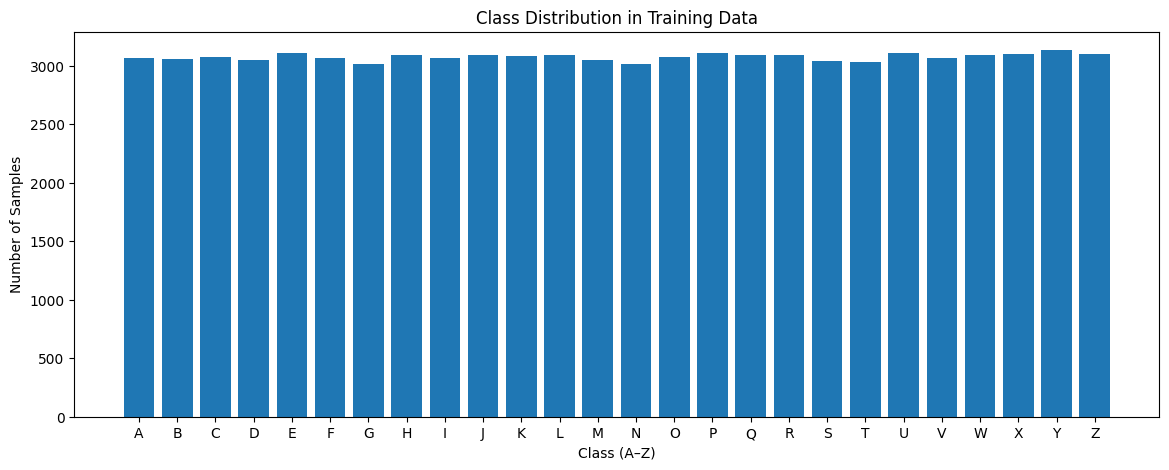

In [ ]:
class_counts = pd.Series(y_int).value_counts().sort_index()
class_counts.index = [chr(i + 65) for i in class_counts.index]
plt.figure(figsize=(14, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class (A–Z)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=0)
plt.show()


In [ ]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [ ]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train_raw = train_data['label'].values


print("Features shape:", X_train.shape)
print("Labels shape:", y_train_raw.shape)


Features shape: (88800, 784)
Labels shape: (88800,)


In [ ]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test_raw = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test_raw.shape)

Features shape: (14800, 784)
Labels shape: (14800,)


In [ ]:

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)


x_train shape:  (88800, 28, 28, 1)
x_test shape:  (14800, 28, 28, 1)


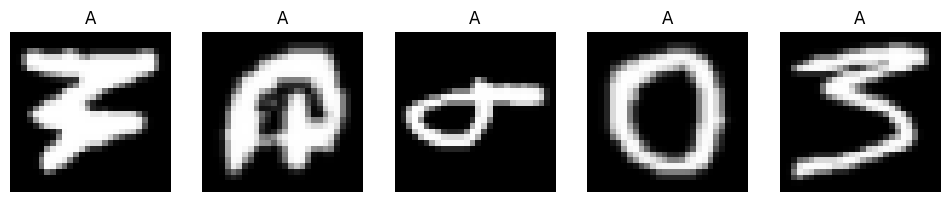

In [ ]:
show_samples(X_train, y_train_raw, n=5)

In [ ]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

# Visualizing some samples after rotation

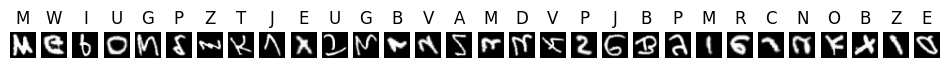

In [ ]:
show_samples(X_train, y_train, n=30)

In [ ]:
# Normlization
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# One Hot Encoding

In [ ]:
y_train = to_categorical(y_train_raw - 1, num_classes=26)
y_test  = to_categorical(y_test_raw - 1, num_classes=26)

# Shuffling the training dataset

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (79920, 28, 28, 1) (79920, 26)
Validation set: (8880, 28, 28, 1) (8880, 26)


In [ ]:
show_samples(X_train, y_train, n=30)

# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input

In [ ]:
# Build MobileNet Model

def build_mobilenet_model(input_shape=(28, 28, 1), num_classes=26):
    inputs = Input(shape=input_shape)

    x = layers.Resizing(32, 32)(inputs)

    x = layers.Conv2D(3, (3, 3), padding='same')(x)

    base_model = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3)
    )

    base_model.trainable = True

    x = base_model(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name="MobileNet_Custom")
    return model

model = build_mobilenet_model()

/tmp/ipykernel_47/3242291643.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile & Train

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # Low LR for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy'),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2, monitor='val_loss')
]
print(model.summary())

Model: "MobileNet_Custom"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 26)             │        33,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,320 (8.74 MB)

 Trainable params: 2,257,208 (8.61 MB)

 Non-trainable params: 34,112 (133.25 KB)

None


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/20


E0000 00:00:1765318896.256441     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.428963     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.754004     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318896.938071     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1248/1249 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4106 - loss: 2.2128

E0000 00:00:1765318935.997705     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.169023     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.493084     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765318936.675469     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1249/1249 ━━━━━━━━━━━━━━━━━━━━ 88s 38ms/step - accuracy: 0.4109 - loss: 2.2115 - val_accuracy: 0.1626 - val_loss: 2.8002 - learning_rate: 1.0000e-04
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8328 - loss: 0.5352 - val_accuracy: 0.7643 - val_loss: 1.0880 - learning_rate: 1.0000e-04
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8877 - loss: 0.3435 - val_accuracy: 0.9057 - val_loss: 0.3483 - learning_rate: 1.0000e-04
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9084 - loss: 0.2730 - val_accuracy: 0.9177 - val_loss: 0.2499 - learning_rate: 1.0000e-04
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9219 - loss: 0.2314 - val_accuracy: 0.9243 - val_loss: 0.2242 - learning_rate: 1.0000e-04
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9272 - loss: 0.2119 - val_accuracy: 0.9258 - val_loss: 0.2135 - learning_rate: 1.0000e-04
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9470 - loss: 0.2081
Test accuracy: 0.9351


In [ ]:
# from sklearn.metrics import classification_report

# report = classification_report(y_true, y_pred, target_names=class_names)
# print("Classification Report:\n")
# print(report)

In [ ]:
unique_labels, counts = np.unique(y_test_raw, return_counts=True)
print("Unique labels in test set:", unique_labels)
print("Counts of each label:", dict(zip(unique_labels, counts)))

Unique labels in test set: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counts of each label: {1: 800, 2: 800, 3: 800, 4: 800, 5: 800, 6: 800, 7: 800, 8: 800, 9: 800, 10: 800, 11: 800, 12: 800, 13: 800, 14: 800, 15: 800, 16: 800, 17: 800, 18: 800, 19: 400}


Observation:
The test dataset used for evaluation is incomplete. It only contains samples for the first 19 classes (labels 1 to 19, corresponding to letters A through S).

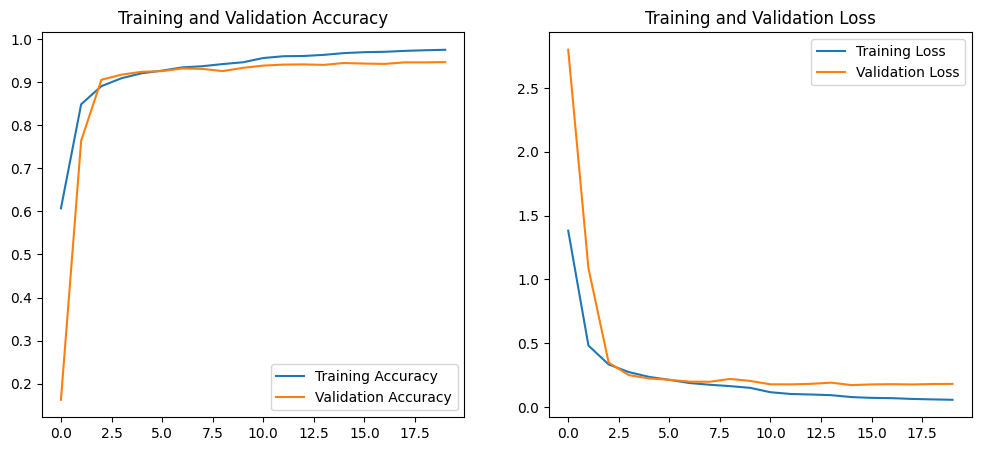

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


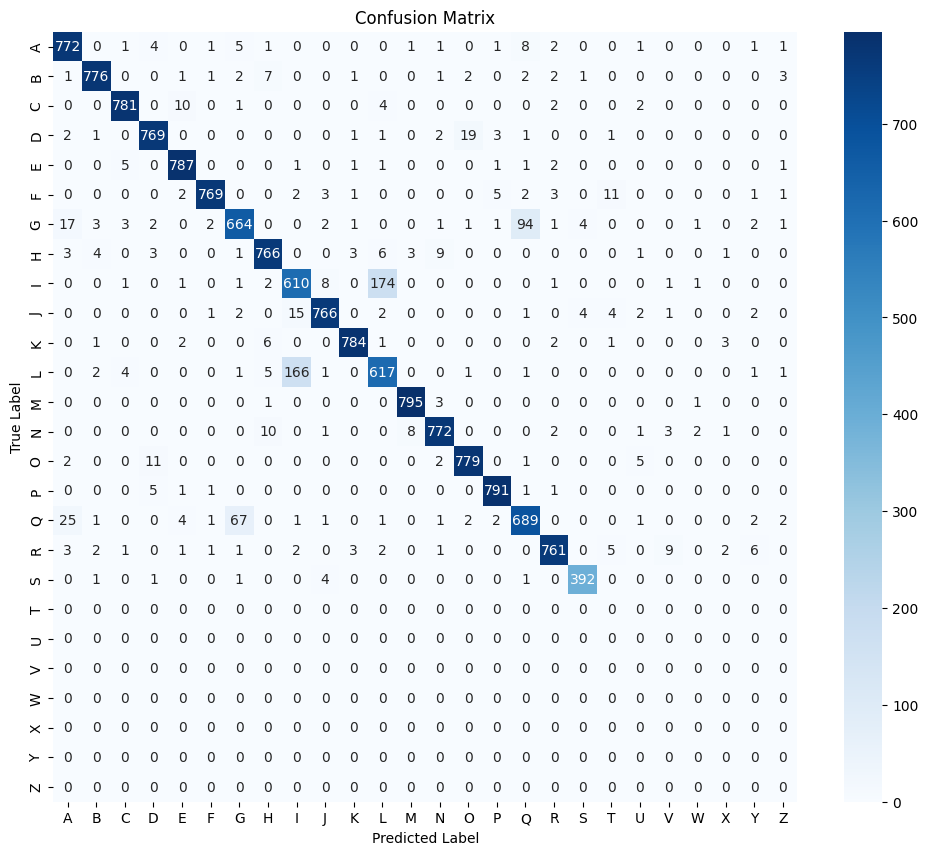

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
class_names = [chr(ord('A') + i) for i in range(26)]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

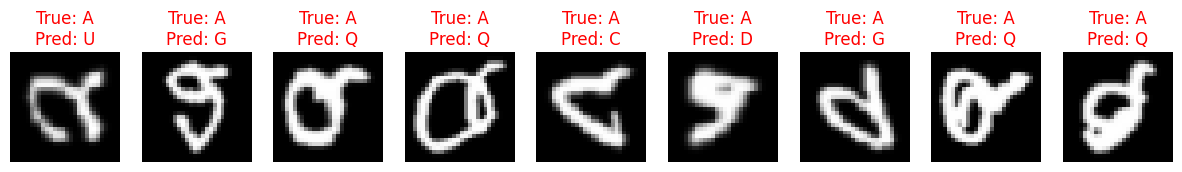

In [ ]:
incorrect_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 5))
for i, incorrect_idx in enumerate(incorrect_indices[:9]):
    ax = plt.subplot(1, 9, i + 1)
    plt.imshow(X_test[incorrect_idx].squeeze(), cmap='gray')
    true_label = chr(ord('A') + y_true[incorrect_idx])
    pred_label = chr(ord('A') + y_pred[incorrect_idx])
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='red')
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1249/1249 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.9242 - loss: 0.2430 - val_accuracy: 0.9463 - val_loss: 0.1787 - learning_rate: 6.2500e-06
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.9337 - loss: 0.1920 - val_accuracy: 0.9437 - val_loss: 0.1757 - learning_rate: 6.2500e-06
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9352 - loss: 0.1825 - val_accuracy: 0.9420 - val_loss: 0.1741 - learning_rate: 6.2500e-06
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9390 - loss: 0.1671 - val_accuracy: 0.9436 - val_loss: 0.1713 - learning_rate: 6.2500e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.9399 - loss: 0.1653 - val_accuracy: 0.9422 - val_loss: 0.1685 - learning_rate: 6.2500e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.9386 - loss: 0.1660 - val_accuracy: 0.9431 - val_loss: 0.1651 - learning_rate: 6.2500e-06


In [ ]:
for layer in model.layers[-40:]:
    if hasattr(layer, "trainable"):
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nFine-Tuning started...\n")

history_ft = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks
)


Fine-Tuning started...

Epoch 1/10


E0000 00:00:1765319664.097096     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.268390     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.590023     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319664.772051     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2495/2498 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9623 - loss: 0.0947

E0000 00:00:1765319721.672327     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319721.843816     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319722.161815     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1765319722.344087     113 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2498/2498 ━━━━━━━━━━━━━━━━━━━━ 106s 26ms/step - accuracy: 0.9623 - loss: 0.0947 - val_accuracy: 0.9458 - val_loss: 0.1758 - learning_rate: 1.0000e-05
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9642 - loss: 0.0877 - val_accuracy: 0.9450 - val_loss: 0.1780 - learning_rate: 1.0000e-05
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9650 - loss: 0.0870 - val_accuracy: 0.9455 - val_loss: 0.1771 - learning_rate: 1.0000e-05
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9675 - loss: 0.0819 - val_accuracy: 0.9445 - val_loss: 0.1799 - learning_rate: 5.0000e-06
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9679 - loss: 0.0792 - val_accuracy: 0.9441 - val_loss: 0.1813 - learning_rate: 5.0000e-06
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9684 - loss: 0.0774 - val_accuracy: 0.9457 - val_loss: 0.1788 - learning_rate: 2.5000e-06


In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1
)

datagen.fit(X_train)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 73s 36ms/step - accuracy: 0.9543 - loss: 0.1208 - val_accuracy: 0.9462 - val_loss: 0.1751 - learning_rate: 2.5000e-06
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9533 - loss: 0.1204 - val_accuracy: 0.9437 - val_loss: 0.1777 - learning_rate: 2.5000e-06
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9547 - loss: 0.1190 - val_accuracy: 0.9436 - val_loss: 0.1755 - learning_rate: 2.5000e-06
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9561 - loss: 0.1149 - val_accuracy: 0.9441 - val_loss: 0.1746 - learning_rate: 1.2500e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.9566 - loss: 0.1128 - val_accuracy: 0.9431 - val_loss: 0.1745 - learning_rate: 1.2500e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.9565 - loss: 0.1134 - val_accuracy: 0.9438 - val_loss: 0.1735 - learning_rate: 1.2500e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1️⃣ Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 2️⃣ Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# 3️⃣ Precision, Recall, F1-score
class_names = [chr(ord('A') + i) for i in range(26)]
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 4️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5️⃣ ROC Curve & AUC
# One-hot encode true labels for ROC calculation
y_true_onehot = y_test  # already one-hot encoded

plt.figure(figsize=(15, 12))
for i in range(len(class_names)):
    fpr, tpr, thresholds = roc_curve(y_true_onehot[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.title('ROC Curve & AUC for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.show()

## VIT

In [ ]:
# Vision Transformer (ViT) for EMNIST letters (28x28x1 → 26 classes)

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26,
    image_size=28,
    patch_size=4,           # 28 / 4 = 7 → 49 patches
    projection_dim=64,
    transformer_layers=4,
    num_heads=4,
    transformer_units=[128, 64],   # MLP inside transformer
    mlp_head_units=[256, 128],     # final classification head
    dropout_rate=0.1
):
    inputs = keras.Input(shape=input_shape)

    # 1) Patch embedding using a Conv2D with stride = patch_size
    # Output shape: (batch, 7, 7, projection_dim) for 28x28 with patch_size=4
    x = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding="valid"
    )(inputs)  # (batch, H', W', projection_dim)

    # Flatten patches: (batch, num_patches, projection_dim)
    num_patches = (image_size // patch_size) ** 2  # 49
    x = layers.Reshape((num_patches, projection_dim))(x)

    # 2) Add learnable positional embeddings
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_embedding_layer = layers.Embedding(
        input_dim=num_patches,
        output_dim=projection_dim
    )
    position_embeddings = pos_embedding_layer(positions)  # (num_patches, projection_dim)
    x = x + position_embeddings  # broadcast over batch

    # 3) Transformer encoder blocks
    for _ in range(transformer_layers):
        # Layer norm before attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)

        # Multi-head self-attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim,
            dropout=dropout_rate
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, x])

        # Layer norm + MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        for units in transformer_units:
            x3 = layers.Dense(units, activation="gelu")(x3)
            x3 = layers.Dropout(dropout_rate)(x3)

        # Second skip connection
        x = layers.Add()([x2, x3])

    # 4) Classification head
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling over the patch tokens
    x = layers.GlobalAveragePooling1D()(x)

    # MLP head
    for units in mlp_head_units:
        x = layers.Dense(units, activation="gelu")(x)
        x = layers.Dropout(dropout_rate)(x)

    # Final classifier
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="vit_emnist_letters")
    return model

# Instantiate the ViT model
model = create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26
)

# Compile it (you can tweak optimizer/lr later)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "vit_emnist_letters"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 7, 7, 64)  │      1,088 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 49, 64)    │          0 │ conv2d_40[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 49, 64)    │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 49, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 49, 128)   │          0 │ dense_25[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 49, 64)    │      8,256 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 49, 64)    │          0 │ dense_26[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 49, 64)    │          0 │ add_1[0][0],      │
│                     │                   │            │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 49, 128)   │          0 │ dense_27[0][0]  

 Total params: 386,906 (1.48 MB)

 Trainable params: 386,906 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.2137 - loss: 2.5540 - val_accuracy: 0.6110 - val_loss: 1.1730 - learning_rate: 0.0010
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.5895 - loss: 1.2563 - val_accuracy: 0.7358 - val_loss: 0.7857 - learning_rate: 0.0010
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.6904 - loss: 0.9465 - val_accuracy: 0.8025 - val_loss: 0.5840 - learning_rate: 0.0010
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7453 - loss: 0.7771 - val_accuracy: 0.8196 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7681 - loss: 0.6999 - val_accuracy: 0.8256 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.7844 - loss: 0.6543 - val_accuracy: 0.8355 - val_loss: 0.4802 - learning_rate: 0.0010
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accura

KeyboardInterrupt: 